In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv('states_all.csv')

## (1) See TOTAL_REVENUE, which includes total revenue data, and TOTAL_EXPENDITURE, which includes total spending data. Do these variables contain outliers?

## (2) If you find outliers in the total income TOTAL_REVENUE and total expenditure TOTAL_EXPENDITURE variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

In [43]:
df["TOTAL_REVENUE"].fillna(df["TOTAL_REVENUE"].mean(), inplace=True)
df["TOTAL_EXPENDITURE"].fillna(df["TOTAL_EXPENDITURE"].mean(), inplace=True)
df
#Öncelikle NaN değerleri mean ile doldurdum.

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2.678885e+06,304177.0,1659028.0,715680.0,2.653798e+06,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1.049591e+06,106780.0,720711.0,222100.0,9.724880e+05,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3.258079e+06,297888.0,1369815.0,1590376.0,3.401580e+06,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1.711959e+06,178571.0,958785.0,574603.0,1.743022e+06,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,2.626002e+07,2072470.0,16546514.0,7641041.0,2.713883e+07,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,9.102045e+06,NaN,NaN,NaN,9.206242e+06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,9.102045e+06,NaN,NaN,NaN,9.206242e+06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,9.102045e+06,NaN,NaN,NaN,9.206242e+06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,9.102045e+06,NaN,NaN,NaN,9.206242e+06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


## Total revenue için bakalım. 

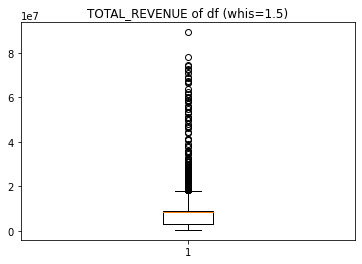

In [44]:
plt.boxplot(df.TOTAL_REVENUE)
plt.title("TOTAL_REVENUE of df (whis=1.5)")
plt.show()

In [45]:
q75, q25 = np.percentile(df["TOTAL_REVENUE"], [75 ,25])
IQR = q75 - q25

In [46]:
threshold_values=[]
for threshold_value in np.arange(1,5,0.5):
    min_value = q25 - (IQR*threshold_value)
    max_value = q75 + (IQR*threshold_value)
    outlier_value_number = len((np.where((df["TOTAL_REVENUE"].dropna() > max_value)| (df["TOTAL_REVENUE"].dropna() < min_value))[0]))
    threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
pd.DataFrame(threshold_values)

,threshold_value,outlier_value_number
0,1.0,208
1,1.5,165
2,2.0,131
3,2.5,105
4,3.0,81
5,3.5,58
6,4.0,50
7,4.5,45


In [47]:
from scipy.stats.mstats import winsorize

winsorizing= winsorize(np.array(df.TOTAL_REVENUE), (0.13, 0.13))
winsorizing

masked_array(data=[2678885.        , 1650621.        , 3258079.        ,
                   ..., 9102044.92941177, 9102044.92941177,
                   9102044.92941177],
             mask=False,
       fill_value=1e+20)

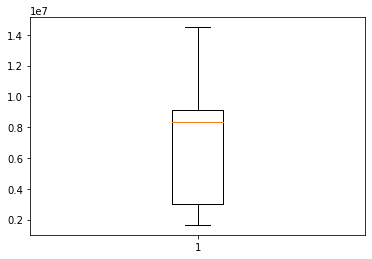

In [48]:
plt.boxplot(winsorizing)
plt.show()

In [50]:
threshold_values=[]
for threshold_value in np.arange(0.5,5,0.5):
    min_value = q25 - (IQR*threshold_value)
    max_value = q75 + (IQR*threshold_value)
    outlier_value_number = len((np.where((winsorizing > max_value)| (winsorizing < min_value))[0]))
    threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
pd.DataFrame(threshold_values)

,threshold_value,outlier_value_number
0,0.5,279
1,1.0,0
2,1.5,0
3,2.0,0
4,2.5,0
5,3.0,0
6,3.5,0
7,4.0,0
8,4.5,0


outlier'ların 1 den büyüh threshold değerleri için sıfırlandığını gördük. 1 alabiliriz değeri.

## ŞİMDİ TOTAL_EXPENDITURE İÇİN YAPALIM

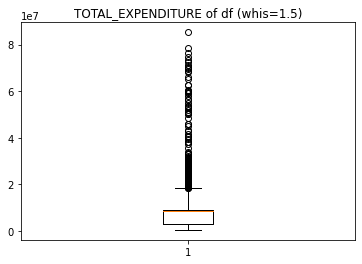

In [35]:
plt.boxplot(df.TOTAL_EXPENDITURE)
plt.title("TOTAL_EXPENDITURE of df (whis=1.5)")
plt.show()

In [36]:
q75, q25 = np.percentile(df["TOTAL_EXPENDITURE"], [75 ,25])
IQR = q75 - q25

In [37]:
threshold_values=[]
for threshold_value in np.arange(1,5,0.5):
    min_value = q25 - (IQR*threshold_value)
    max_value = q75 + (IQR*threshold_value)
    outlier_value_number = len((np.where((df["TOTAL_EXPENDITURE"].dropna() > max_value)| (df["TOTAL_EXPENDITURE"].dropna() < min_value))[0]))
    threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
pd.DataFrame(threshold_values)

,threshold_value,outlier_value_number
0,1.0,203
1,1.5,161
2,2.0,131
3,2.5,106
4,3.0,82
5,3.5,61
6,4.0,50
7,4.5,49


Az öncekinde winsorizing kullandık. Bunda da loglama yapalım.


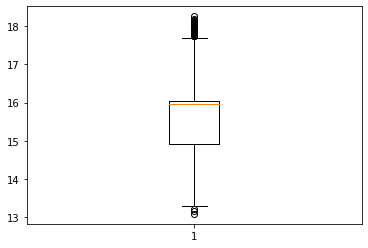

In [38]:
plt.boxplot(np.log(df["TOTAL_EXPENDITURE"].dropna()))
plt.show()

In [39]:
q75_log, q25_log = np.percentile(np.log(df["TOTAL_EXPENDITURE"].dropna()), [75 ,25])
IQR_log = q75_log - q25_log

In [40]:
log_threshold_values=[]

for threshold_value in np.arange(1,5,0.5):
    min_value_log = q25_log - (IQR_log*threshold_value) 
    max_value_log = q75_log + (IQR_log*threshold_value)
    min_value = q25 - (IQR*threshold_value) 
    max_value = q75 + (IQR*threshold_value) 
    
    outlier_value_number_log = len((np.where((np.log(df["TOTAL_EXPENDITURE"].dropna()) > max_value_log)| 
                                       (np.log(df["TOTAL_EXPENDITURE"].dropna()) < min_value_log))[0]))
    outlier_value_number = len((np.where((df["TOTAL_EXPENDITURE"].dropna() > max_value)| 
                                       (df["TOTAL_EXPENDITURE"].dropna() < min_value))[0]))
    log_threshold_values.append({'threshold_value': threshold_value,
                                 'outlier_value_number' : outlier_value_number,
                                 'outlier_value_number_log': outlier_value_number_log })
pd.DataFrame(log_threshold_values)

,threshold_value,outlier_value_number,outlier_value_number_log
0,1.0,203,148
1,1.5,161,38
2,2.0,131,0
3,2.5,106,0
4,3.0,82,0
5,3.5,61,0
6,4.0,50,0
7,4.5,49,0


threshold_value'yu 2 seçtiğimizde tüm outlierlardan kurtulabiliriz.

## (3) Subtract the total expenditure TOTAL_EXPENDITURE from the total income variable TOTAL_REVENUE to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

In [51]:
df["budget_deficit"] = df["TOTAL_EXPENDITURE"] - df["TOTAL_REVENUE"]

In [52]:
df.budget_deficit

0       -25087.000000
1       -77103.000000
2       143501.000000
3        31063.000000
4       878807.000000
            ...      
1710    104197.192157
1711    104197.192157
1712    104197.192157
1713    104197.192157
1714    104197.192157
Name: budget_deficit, Length: 1715, dtype: float64

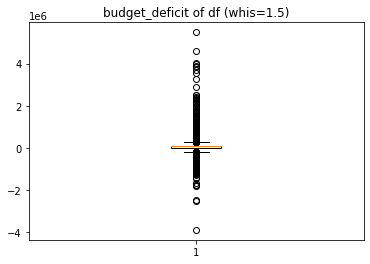

In [53]:
plt.boxplot(df.budget_deficit)
plt.title("budget_deficit of df (whis=1.5)")
plt.show()

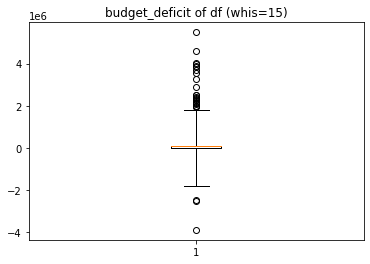

In [56]:
plt.boxplot(df.budget_deficit, whis=15)
plt.title("budget_deficit of df (whis=15)")
plt.show()

In [57]:
q75, q25 = np.percentile(df["budget_deficit"], [75 ,25])
IQR = q75 - q25

In [58]:
threshold_values=[]
for threshold_value in np.arange(1,5,0.5):
    min_value = q25 - (IQR*threshold_value)
    max_value = q75 + (IQR*threshold_value)
    outlier_value_number = len((np.where((df["budget_deficit"].dropna() > max_value)| (df["budget_deficit"].dropna() < min_value))[0]))
    threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
pd.DataFrame(threshold_values)

,threshold_value,outlier_value_number
0,1.0,480
1,1.5,362
2,2.0,294
3,2.5,251
4,3.0,222
5,3.5,185
6,4.0,157
7,4.5,131


In [77]:
from scipy.stats.mstats import winsorize

winsorizing3= winsorize(np.array(df.TOTAL_REVENUE), (0.13, 0.13))
winsorizing3

masked_array(data=[2678885.        , 1650621.        , 3258079.        ,
                   ..., 9102044.92941177, 9102044.92941177,
                   9102044.92941177],
             mask=False,
       fill_value=1e+20)

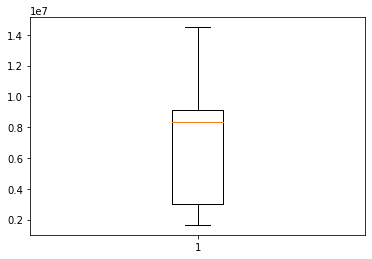

In [78]:
plt.boxplot(winsorizing3)
plt.show()

In [79]:
threshold_values=[]
for threshold_value in np.arange(100,126,2):
    min_value = q25 - (IQR*threshold_value)
    max_value = q75 + (IQR*threshold_value)
    outlier_value_number = len((np.where((winsorizing3 > max_value)| (winsorizing3 < min_value))[0]))
    threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
pd.DataFrame(threshold_values)

,threshold_value,outlier_value_number
0,100,270
1,102,265
2,104,260
3,106,253
4,108,247
5,110,242
6,112,235
7,114,230
8,116,227
9,118,0


threshold'u 118 aldığımızda outliersdan kurtulduk.

## Again create a variable that can be considered as a budget deficit by subtracting the total income TOTAL_REVENUE variable from the total expenditure TOTAL_EXPENDITURE. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

In [114]:
df = pd.read_csv('states_all.csv')
df.shape        #hiçbir şey silmeden shape

(1715, 25)

In [115]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


In [117]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = df.index[(df[ft] < lower_bound) | (df[ft]>upper_bound)]
    return ls

In [118]:
index_list = []
for feature in ['TOTAL_REVENUE']:
    index_list.extend(outliers(df , feature))
print(len(index_list))
print(index_list)       

110
[4, 55, 134, 157, 185, 208, 236, 259, 287, 310, 338, 349, 361, 389, 400, 412, 440, 451, 463, 491, 502, 514, 542, 553, 565, 593, 604, 616, 644, 655, 667, 695, 706, 718, 723, 744, 746, 752, 757, 769, 774, 778, 795, 797, 803, 808, 820, 825, 829, 846, 848, 854, 859, 871, 876, 880, 897, 899, 905, 910, 922, 927, 931, 948, 950, 956, 961, 973, 978, 982, 999, 1001, 1007, 1012, 1024, 1029, 1033, 1050, 1052, 1058, 1063, 1075, 1080, 1084, 1101, 1103, 1109, 1114, 1126, 1131, 1135, 1152, 1154, 1160, 1165, 1177, 1182, 1186, 1203, 1205, 1208, 1211, 1216, 1228, 1233, 1237, 1254, 1256, 1262, 1267]


In [119]:
def remove(df , ls):
    ls = sorted(set(ls))
    df=df.drop(ls)
    return df

In [121]:
df = remove(df , index_list)

In [122]:
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [123]:
index_list2 = []
for feature in ["TOTAL_EXPENDITURE"]:
    index_list2.extend(outliers(df , feature))
print(len(index_list2))
print(index_list2)  

48
[32, 83, 106, 145, 196, 247, 298, 472, 519, 523, 532, 548, 570, 574, 583, 591, 599, 621, 625, 634, 642, 647, 650, 672, 676, 685, 693, 698, 701, 727, 736, 749, 787, 800, 826, 838, 851, 877, 889, 902, 940, 953, 1004, 1055, 1106, 1157, 1234, 1259]


In [125]:
df = remove(df , index_list2)

In [126]:
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


İki değer için de outliers temizlendi. Şimdi tekrar bütçe açığı hesaplayalım.


In [127]:
df["budget_deficit"] = df["TOTAL_EXPENDITURE"] - df["TOTAL_REVENUE"]

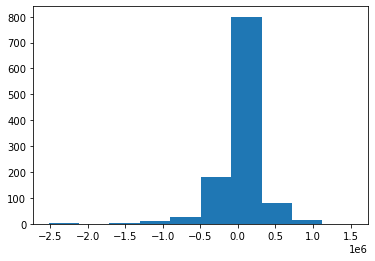

In [129]:
plt.hist(df["budget_deficit"])
plt.show()

Normal dağılıma daha fazla yaklaştı.

In [130]:
q75, q25 = np.percentile(df["budget_deficit"], [75 ,25])
IQR = q75 - q25

In [131]:
threshold_values=[]
for threshold_value in np.arange(1,5,0.5):
    min_value = q25 - (IQR*threshold_value)
    max_value = q75 + (IQR*threshold_value)
    outlier_value_number = len((np.where((df["budget_deficit"].dropna() > max_value)| (df["budget_deficit"].dropna() < min_value))[0]))
    threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
pd.DataFrame(threshold_values)

,threshold_value,outlier_value_number
0,1.0,0
1,1.5,0
2,2.0,0
3,2.5,0
4,3.0,0
5,3.5,0
6,4.0,0
7,4.5,0


Görüldüğü üzere aykırı değer kalmadı.

## (5)Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

Evet outliers değerlerine de baktığımızda açıkça görülmektedir ki önce iki feature'un da aykırı değerlerini temizlediğimizde , bütçe açığı aykırı değersiz çıktı. İlkinde çok çok fazla outlier çıkmıştı.

## (6) If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

Bütçe açığı bizim için çok önemli bir değer olduğunda outlierları görmek isteriz diye düşünüyorum. Çünkü ne kadar fazla açık oluştuğunu görmek durumun ne kadar vahamiyeti olduğunu gösterecek güçte. Ne kadar fazla aykırı değer varsa o kadar çok büte aşılmış demektir. O yüzden 1. durumu kullanırdım. Verilerin hepsini silmeden görmek amacımız.